# model 1



In [1]:
# Packages

import sys
import os
# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))
# Import module
from XGBoost_Functions import *
# Model name
model_name = 'rating_change_model_1'
import json

In [2]:
# Load the data
df = load_data()

In [3]:
# Get the column names and mapping
numeric_feature_columns, cat_feature_columns, target_column, custom_mapping = get_column_names_and_mapping_change(model_name)

In [4]:
# Create matrices
X_train_scaled, X_test_scaled, y_train, y_test, _ = prepare_matrices(df, numeric_feature_columns, cat_feature_columns, target_column, custom_mapping, change=False)


feature names: 
['num__Altman_Z' 'num__Altman_Z_diff']


In [5]:
# Train model
best_model = train_model_with_grid_search(X_train_scaled, y_train,len(custom_mapping), model_name)

Tuned hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 10000, 'objective': 'multi:softprob'}
Train accuracy of best model:  0.9984058301070371
Best mean CV accuracy: 0.9111803898092935


{'accuracy': 0.9186046511627907, 'f1_score': 0.9148227261925014, 'majority_baseline': 0.9534883720930233}
Share of predictions exactly as the actual: 91.86%
Share of predictions 1 or fewer ratings away from actual: 99.82%


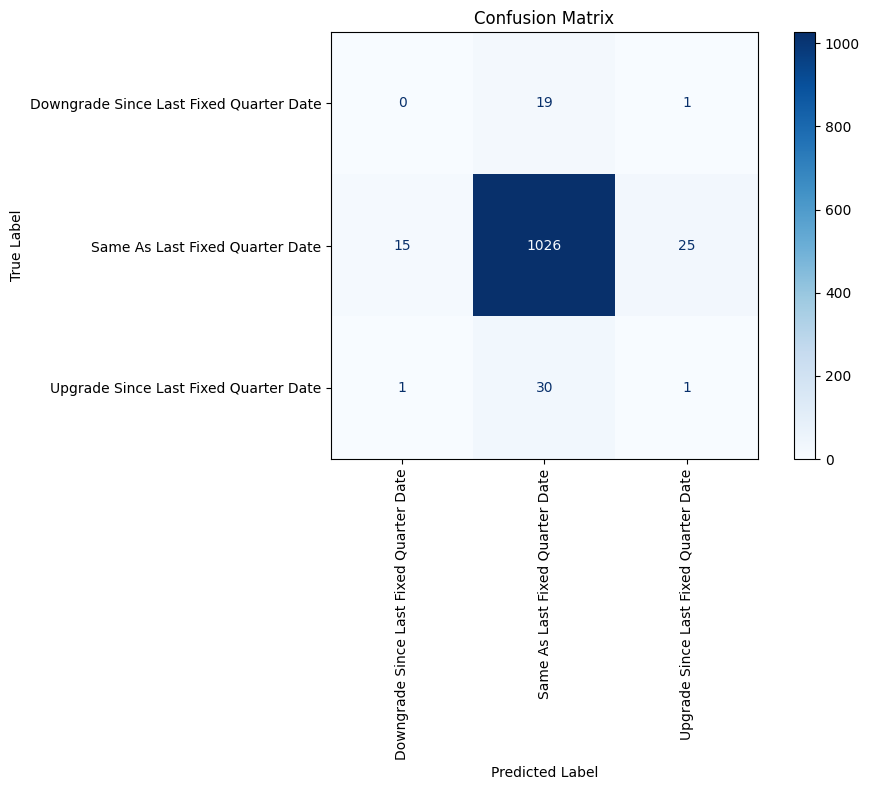

In [6]:
# Evaluate model
evaluate_model(best_model, X_test_scaled, y_test, custom_mapping,model_name)

In [7]:
# Get predictions
get_model_predictions(best_model, X_test_scaled, y_test, custom_mapping, model_name, target_column, df)

X_test_scaled shape
(1118, 2)
y_test shape
(1118,)
accuracy: 0.9186046511627907
share of correct predictions: 0.9186046511627907
assertion that they match:


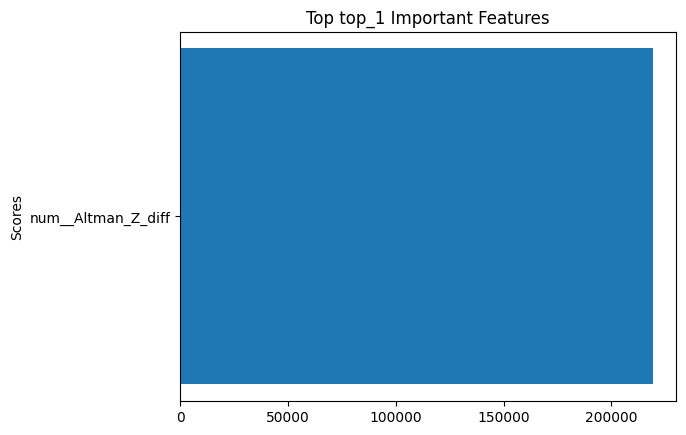

<Figure size 1500x2000 with 0 Axes>

In [8]:
# plot important features
plot_importance(best_model,_,model_name,1)